In [149]:
import numpy as np
from scipy.linalg import expm
from scipy.optimize import minimize
from numpy import linalg as LA
import matplotlib.pyplot as plt
%matplotlib inline 

In [150]:
def conjugation(U, H):
    return np.conj(U.T) @ H @ U

In [151]:
def diagonalize(H):
    eigenValues, eigenVectors = linalg.eig(H)

    idx = eigenValues.argsort() 
    eigenValues = eigenValues[idx]
    return eigenValues

In [152]:
def cost_function(U, H, D):
    return numpy.linalg.norm(D - conjugation(v,H))

In [153]:
def cost_brockett(U, H):
    # Maximizing the Brockett criterion, i.e. Trace(U^* H U N) over U 
    N = np.diag(np.arange(H.shape[0]))
    return np.trace(conjugation(U,H) @ N)

In [154]:
def euclidean_gradient(U, H):
    # The Euclidean gradient of the Brockett criterion is given by HUN
    N = np.diag(np.arange(H.shape[0]))
    return H @ U @ N

In [155]:
def riemannian_gradient(U, H):
    eucl_grad = euclidean_gradient(U,H)
    G = eucl_grad @ np.conj(U.T) - U @ np.conj(eucl_grad.T)
    return G

In [156]:
def take_step(U, grad, step_size):
    # no minus, since we want to maximize the brockett criterion
    new_U = expm(step_size * grad) @ U
    return new_U

In [157]:
def is_square(H):
    result = True if H.shape[0] == H.shape[1] else False
    return result

In [158]:
def steepest_descent(H, step_size, U0=None, steps=10):
    if not is_square(H):
        print("Matrix is not square, aborting")
        return None
    if U0 is None:
        U = np.identity(H.shape[0])
    else:
        U = U0
          
    f_values = np.zeros(steps)
    for i in np.arange(steps):
        f_values[i] = cost_brockett(U, H)
        grad = riemannian_gradient(U, H)
        U = take_step(U, grad, step_size)
        
    return f_values, U

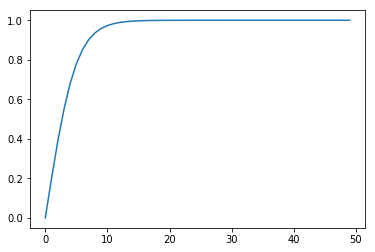

In [160]:
H = np.array([[0,1], [1,0]])
U0 = np.identity(2)
n = 50
step_size = 0.1

fs, last_U = steepest_descent(H, step_size, U0=U0, steps=n)
plt.plot(np.arange(n), fs)

In [ ]:
w,v = LA.eig(A)
v
np.conjugate(v.T)

In [ ]:
np.conjugate(v.T) @ A @ v

In [ ]:
cost_brockett(np.identity(2), A)

In [ ]:
print(riemannian_gradient(A, np.identity(2)),)

In [163]:
test_m = np.array([[1, -1],[-1, 3]])
np.maximum(test_m, 0)**2

array([[1, 0],
       [0, 9]])

In [168]:
A = np.ones(4).reshape(2,2)
B = np.arange(4).reshape(2,2)

In [180]:
np.einsum('ii->', B)

3